In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

# Load environment variable from .env file
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

# Initialize the language model (LLM) with a specific model
llm=ChatGroq(model="qwen-2.5-32b")


In [4]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from typing import Dict
from IPython.display import Image, display

In [5]:
# Define the structure of the blog state using TypedDict.
# This validates that each entry has 3 components, each of string data type: topic, title, and content.

class Blog(TypedDict):
    blog_topic: str  # The main topic of the blog
    blog_title: str  # The generated title for the blog
    blog_content: str  # The generated content for the blog

In [6]:
# Function to create a blog title based on the provided user topic

#CreateTitle function takes one argument, state, which is expected to be of Blog type (a TypedDict with blog_topic, blog_title, and blog_content).
#It returns a dictionary (Dict[str, str]), where the key is "blog_title" and the value is a string (generated title).

def CreateTitle(state: Blog) -> Dict[str, str]:
    """Creating an appropriate blog title for the topic given"""
    prompt = f"Create an interesting blog title for the topic: {state['blog_topic']}"
    result = llm.invoke(prompt)   # Invoke the LLM with the prompt

    # Returning the generated blog title as a dictionary
    return {"blog_title": result.content}

In [7]:
# Function to generate blog content based on the title

def CreateContent(state: Blog) -> Dict[str, str]:
    """Creates a blog post for the given title."""

    # Ensure that the blog title exists before generating content
    if 'blog_title' not in state:
        raise KeyError("Missing 'blog_title' in state.")
    
    # Prompt the LLM to generate blog content with an example
    prompt = f"Create a concise blog post of 100 words for the title : {state['blog_title']}"
    result = llm.invoke(prompt)  
    return {"blog_content": result.content}

# LangGraph

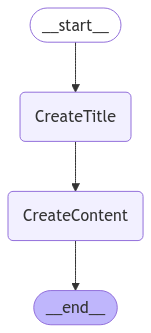

In [8]:
# Initialize the state graph with the Blog structure
builder = StateGraph(Blog)

# Add nodes representing the functions in the workflow
builder.add_node("CreateTitle",CreateTitle)
builder.add_node("CreateContent",CreateContent)

# Define the sequence of execution (edges)
builder.add_edge(START,"CreateTitle")
builder.add_edge("CreateTitle","CreateContent")
builder.add_edge("CreateContent",END)

# Compile the graph and displaying the graph structure as an image
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Invoke the graph with an initial topic to generate a blog post
state = graph.invoke({"blog_topic": "Sanskrit language origin and interesting facts"})

# Print the generated blog content
print(state["blog_content"])


Sanskrit, one of the world's oldest languages, dates back over 3,500 years and is considered the mother of many modern languages. Originally used by ancient Indian scholars for sacred texts, this language is known for its complex grammar and phonetic precision. Interestingly, Sanskrit's structured syntax influenced the development of computer programming languages. Its rich literature spans poetry, drama, and scientific treatises, making it a treasure trove for linguists and historians. The language's revival in modern times underlines its enduring relevance and profound impact on global culture.

